In [3]:
! pip install -q sentence-transformers



ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'D:\\GenerativeAI\\MLOPS\\MLOPS-COMPLETE-PIPELINE\\data_ingestion\\Lib\\site-packages\\sklearn\\model_selection\\tests\\test_split.py'
Check the permissions.



In [6]:
from sentence_transformers import SentenceTransformer

In [7]:
model = SentenceTransformer("all-MiniLM-L6-v2")

In [8]:
sentences = [
    "The dog sits outside waiting for treat .",
    "I am going Swimming. ",
    "The dog is swimming . "
]

In [9]:
embeddings = model.encode(sentences)

In [10]:
print(embeddings.shape)

(3, 384)


In [11]:
similarities = model.similarity(embeddings, embeddings)
print(similarities)

tensor([[ 1.0000, -0.0309,  0.2804],
        [-0.0309,  1.0000,  0.3837],
        [ 0.2804,  0.3837,  1.0000]])


In [5]:
from io import BytesIO
import requests
from PIL import Image
from sentence_transformers import SentenceTransformer

In [12]:
response = requests.get(
  "https://github.com/PacktPublishing/LLM-Engineers-Handbook/blob/main/images/crazy_cat.jpg" 
)

In [13]:
print(response)

<Response [200]>


In [15]:
# sanity-check the response is an image before opening
content_type = response.headers.get("Content-Type", "")
if not content_type.startswith("image/"):
	raise ValueError(f"URL did not return an image. Content-Type: {content_type}")

image = Image.open(BytesIO(response.content))

ValueError: URL did not return an image. Content-Type: text/html; charset=utf-8

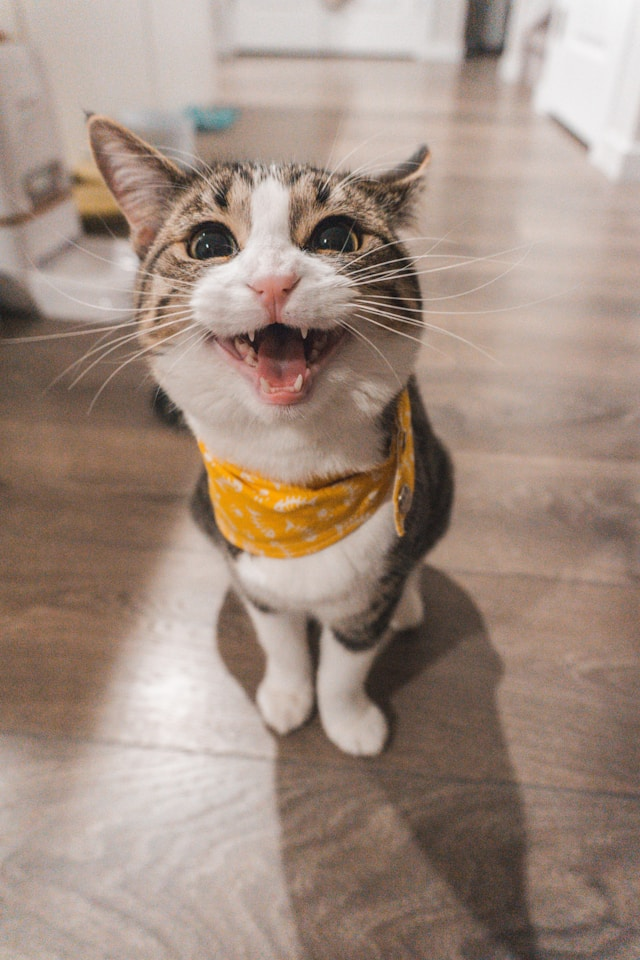

In [17]:
import requests
from io import BytesIO
from PIL import Image, UnidentifiedImageError

raw_url = "https://raw.githubusercontent.com/PacktPublishing/LLM-Engineers-Handbook/main/images/crazy_cat.jpg"

resp = requests.get(raw_url, timeout=10)
resp.raise_for_status()

content_type = resp.headers.get("Content-Type", "")
if not content_type.startswith("image/"):
    # as a fallback try to open it anyway (sometimes servers omit headers)
    try:
        img = Image.open(BytesIO(resp.content))
    except UnidentifiedImageError:
        raise ValueError(f"URL did not return an image. Content-Type: {content_type}")
else:
    img = Image.open(BytesIO(resp.content))

img = img.convert("RGB")  # optional
display(img)  # in notebook

In [16]:
model  = SentenceTransformer("clip-viT-B-32")


d:\GenerativeAI\MLOPS\MLOPS-COMPLETE-PIPELINE\data_ingestion\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\user\.cache\huggingface\hub\models--sentence-transformers--clip-viT-B-32. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Xet Storage is enabled for this repo, but the 'hf_xet' package is not ins

In [19]:
img_emb = model.encode(img)

In [20]:
text_emb = model.encode(
["A crazy cat smiling.",
"A white and brown cat with a yellow bandana.",
"A man eating in the garden."]
)

In [21]:
print(text_emb.shape)

(3, 512)


In [22]:
similarity_scores = model.similarity(img_emb, text_emb)

In [23]:
print(similarity_scores)

tensor([[0.3068, 0.3300, 0.1719]])


In [26]:
! pip install -q instructor-embedding



ERROR: Could not find a version that satisfies the requirement instructor-embedding (from versions: none)
ERROR: No matching distribution found for instructor-embedding


In [27]:
# ensure the package is installed in the current Jupyter kernel
%pip install -q instructor-embedding

from InstructorEmbedding import INSTRUCTOR

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement instructor-embedding (from versions: none)
ERROR: No matching distribution found for instructor-embedding


ModuleNotFoundError: No module named 'InstructorEmbedding'